### Import modules

In [215]:
# import modules 
import pandas
#import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

### Load data

In [216]:
# converted to csv
fp = '/Users/annalea_albright/Downloads/Sample_portfolio-Table 1 2.csv'
df = pandas.read_csv(
    fp,
    thousands=','
    )
df.set_index('Stock Name', inplace=True)
print(df.head())

                     Reporting Year          Isin             GICS Sector  \
Stock Name                                                                  
Samsung Electronics            2019  KR7005931001  Information Technology   
Taiwan Semicon Man             2019  TW0002330008  Information Technology   
Tencent Hldgs Limi             2018  KYG875721634  Communication Services   
Naspers                        2019  ZAE000015889  Consumer Discretionary   
Tata Motors Limited            2019  INE155A01022  Consumer Discretionary   

                                          GICS Industry Group  \
Stock Name                                                      
Samsung Electronics           Technology Hardware & Equipment   
Taiwan Semicon Man   Semiconductors & Semiconductor Equipment   
Tencent Hldgs Limi                      Media & Entertainment   
Naspers                                             Retailing   
Tata Motors Limited                  Automobiles & Components   

    

In [217]:
print('Names of columns:', df.columns.values)

Names of columns: ['Reporting Year' 'Isin' 'GICS Sector' 'GICS Industry Group'
 'Value Of Holding in USD' 'Weight in Portfolio (%)'
 'Company Revenue in millions of USD' 'Market Cap in millions of USD'
 'Company Direct GHG Emissions (Tonnes)'
 'Company First Tier Indirect GHG Emissions (Tonnes)'
 'GHG Emissions Disclosure Type'
 'Company Carbon Intensity (tCO2e/million USD)'
 '% Equity Ownership of Company'
 'Apportioned Direct GHG Emissions (Tonnes)'
 'Apportioned First Tier GHG Indirect Emissions (Tonnes)'
 'Apportioned Direct+FirstTier GHG Emissions (Tonnes)'
 'Apportioned Revenues in millions of USD' 'Rank (Best to worst)'
 'Rank (Worst to best)']


In [155]:
df.describe()

,Reporting Year,Value Of Holding in USD,Company Revenue in millions of USD,Market Cap in millions of USD,Company Direct GHG Emissions (Tonnes),Company First Tier Indirect GHG Emissions (Tonnes),Company Carbon Intensity (tCO2e/million USD),% Equity Ownership of Company,Apportioned Direct GHG Emissions (Tonnes),Apportioned First Tier GHG Indirect Emissions (Tonnes),Apportioned Direct+FirstTier GHG Emissions (Tonnes),Apportioned Revenues in millions of USD,Rank (Best to worst),Rank (Worst to best),Equity Ownership of Company,carbon_to_revenue
count,25.000000,2.500000e+01,25.00000,25.000000,2.500000e+01,2.500000e+01,25.000000,0.0,25.000000,25.000000,25.000000,25.000000,0.0,0.0,25.000000,25.000000
mean,2018.480000,2.200000e+07,31106.24000,77341.120000,1.285478e+06,5.287223e+06,522.650076,NaN,2847.214545,13028.538186,15875.752731,19.623026,NaN,NaN,0.001838,522.650076
std,0.509902,9.464847e+06,50205.31881,114308.207795,4.439824e+06,9.842843e+06,1338.408694,NaN,11384.245370,50102.072205,52216.192076,35.413341,NaN,NaN,0.003017,1338.408694
min,2018.000000,1.500000e+07,1585.00000,1314.000000,1.480000e+02,1.602740e+05,27.571314,NaN,0.183350,117.516796,123.674708,0.796482,NaN,NaN,0.000084,27.571314
25%,2018.000000,1.500000e+07,5255.00000,7638.000000,1.068700e+04,4.575350e+05,36.478573,NaN,6.157912,268.477513,276.095854,6.103551,NaN,NaN,0.000223,36.478573
50%,2018.000000,2.000000e+07,8135.00000,16099.000000,5.520900e+04,1.098869e+06,162.420751,NaN,55.095271,922.301422,1144.186047,7.717248,NaN,NaN,0.001239,162.420751
75%,2019.000000,2.500000e+07,34617.00000,103599.000000,4.587590e+05,4.552301e+06,283.851293,NaN,629.350294,2434.582197,3085.457977,12.479886,NaN,NaN,0.002489,283.851293
max,2019.000000,5.000000e+07,197732.00000,477799.000000,2.212587e+07,4.387633e+07,6628.238630,NaN,57064.647524,250582.465753,257565.098935,145.242998,NaN,NaN,0.015221,6628.238630


In [301]:
np.round(df.groupby('GICS Sector')['Company First Tier Indirect GHG Emissions (Tonnes)'].describe(),1)

,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Communication Services,5.0,5500642.2,9174705.7,430773.0,862544.0,1433613.0,2952321.0,21823960.0
Consumer Discretionary,2.0,5990572.0,7785248.5,485570.0,3238071.0,5990572.0,8743073.0,11495574.0
Consumer Staples,3.0,8186088.3,7535093.7,1725030.0,4047498.5,6369967.0,11416617.5,16463268.0
Energy,1.0,160274.0,NaN,160274.0,160274.0,160274.0,160274.0,160274.0
Financials,7.0,1091476.1,1556694.4,198946.0,302072.5,504336.0,890302.5,4552301.0
Health Care,2.0,360540.0,137171.6,263545.0,312042.5,360540.0,409037.5,457535.0
Industrials,1.0,900635.0,NaN,900635.0,900635.0,900635.0,900635.0,900635.0
Information Technology,4.0,14678905.8,20026549.5,1520809.0,1664871.2,6659240.5,19673275.0,43876333.0


In [158]:
df.groupby('GICS Sector')[['Company Revenue in millions of USD', 'Market Cap in millions of USD', 'Company Direct GHG Emissions (Tonnes)', 'Company First Tier Indirect GHG Emissions (Tonnes)']].std()

,Company Revenue in millions of USD,Market Cap in millions of USD,Company Direct GHG Emissions (Tonnes),Company First Tier Indirect GHG Emissions (Tonnes)
GICS Sector,,,,
Communication Services,45681.529958,203080.473079,1.566109e+05,9.174706e+06
Consumer Discretionary,27596.256349,67892.150489,3.471901e+05,7.785248e+06
Consumer Staples,7158.444314,58086.153310,1.329565e+05,7.535094e+06
Energy,NaN,NaN,NaN,NaN
Financials,53471.534255,75966.420644,1.908727e+04,1.556694e+06
Health Care,608.111832,1941.715221,3.115583e+04,1.371716e+05
Industrials,NaN,NaN,NaN,NaN
Information Technology,91330.750537,128935.596158,1.943682e+06,2.002655e+07


### Calculate company carbon footprint, or intensity
= Direct + First Tier Indirect emissions in tonnes / Company Revenues in USD million

In [218]:
carbon_emissions = df['Company Direct GHG Emissions (Tonnes)'] + df['Company First Tier Indirect GHG Emissions (Tonnes)']
revenue = df['Company Revenue in millions of USD']
df['Company Carbon Intensity (tCO2e/million USD)'] = carbon_emissions / revenue

### make a barplot showing this

Text(0.5, 0, 'Company Carbon Intensity (tCO2e/million USD)')

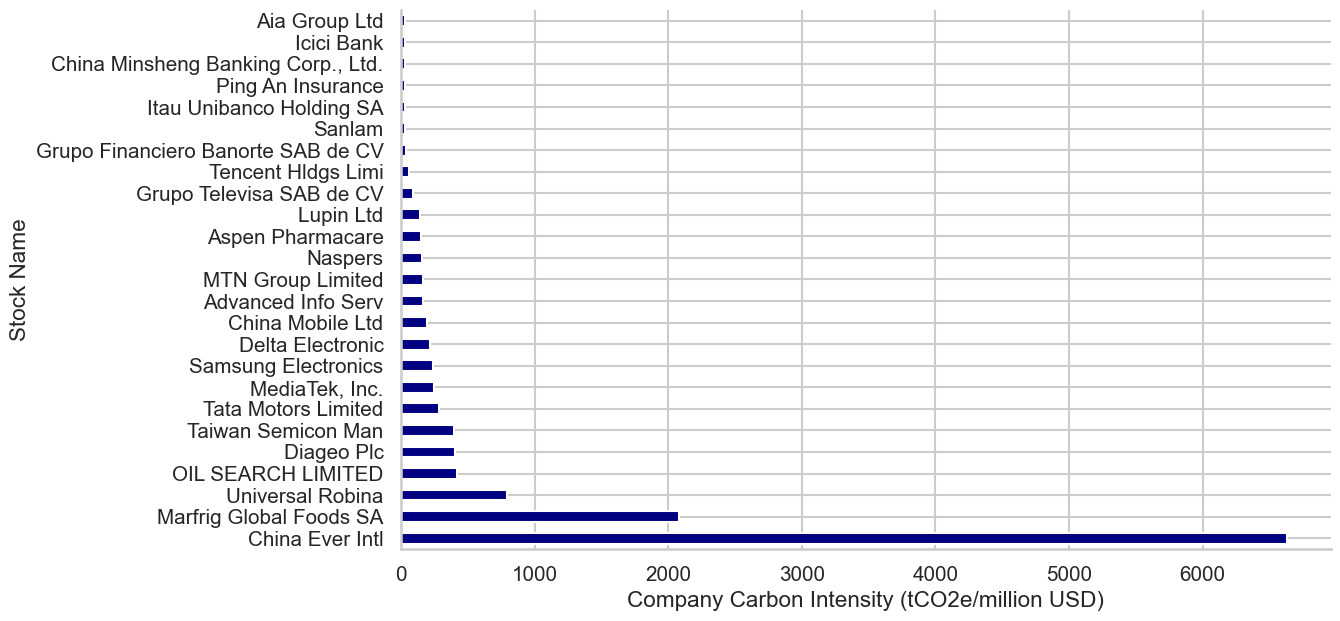

In [219]:
plt.figure(figsize=(12,7))
ax = df['Company Carbon Intensity (tCO2e/million USD)'].sort_values(ascending=False).plot.barh(rot=0, color="navy")
sns.despine()
plt.xlabel('Company Carbon Intensity (tCO2e/million USD)')

### Percentage of equity ownership of each holding
= value of holding in company in USD / market capitalisation of company in USD

In [220]:
equity_ownership = df['Value Of Holding in USD'] / (df['Market Cap in millions of USD'] * 1e6) # factor 1e6 to convert from millions of USD --> dollars
df['Equity Ownership of Company'] = equity_ownership

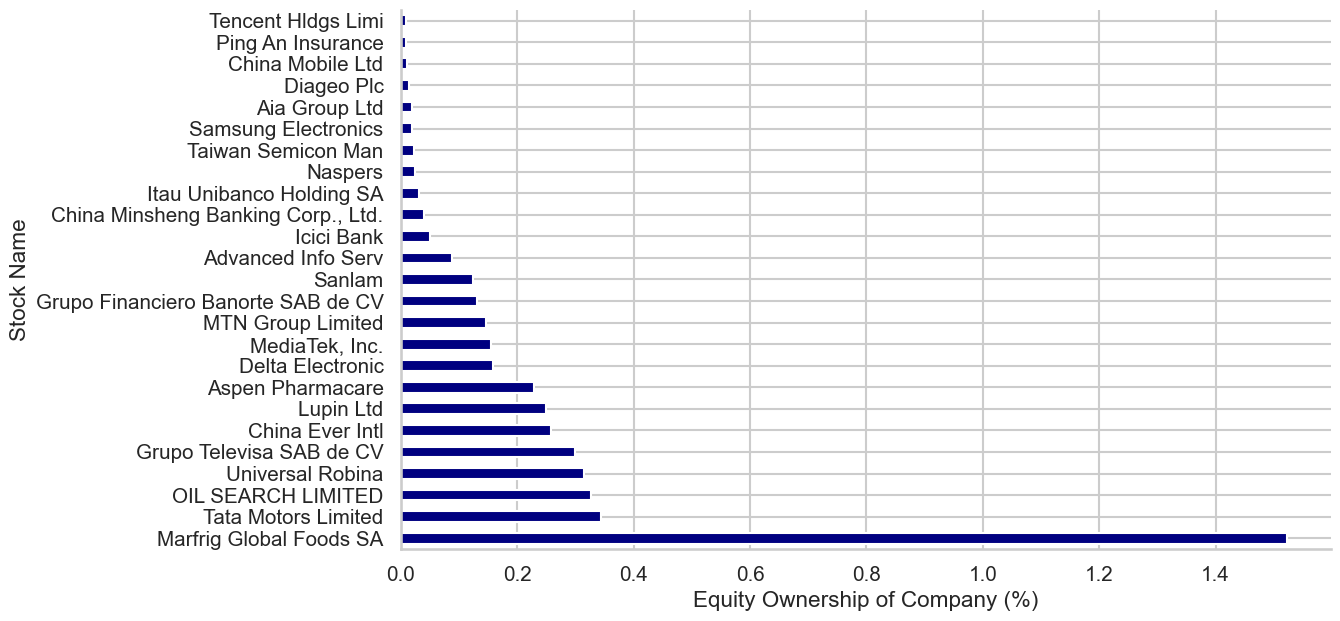

In [221]:
plt.figure(figsize=(12,7))
ax = (df['Equity Ownership of Company']*100).sort_values(ascending=False).plot.barh(rot=0, color="navy")
plt.xlabel('Equity Ownership of Company (%)')
sns.despine()

### Calculate amount of Direct + First Tier Indirect emissions of company that should be apportioned to the holding in the portfolio
= emissions * equity ownership

In [222]:
df['Apportioned Direct GHG Emissions (Tonnes)'] = df['Company Direct GHG Emissions (Tonnes)'] * df['Equity Ownership of Company']
df['Apportioned First Tier GHG Indirect Emissions (Tonnes)'] = df['Company First Tier Indirect GHG Emissions (Tonnes)'] * df['Equity Ownership of Company']
df['Apportioned Direct+FirstTier GHG Emissions (Tonnes)'] = df['Apportioned Direct GHG Emissions (Tonnes)'] + df['Apportioned First Tier GHG Indirect Emissions (Tonnes)']

### Calculate revenues of company that should be apportioned to the holding in the portfolio (apportioning by the % equity ownership)
 = revenue * equity ownership

In [223]:
df['Apportioned Revenues in millions of USD'] = df['Company Revenue in millions of USD'] * df['Equity Ownership of Company']

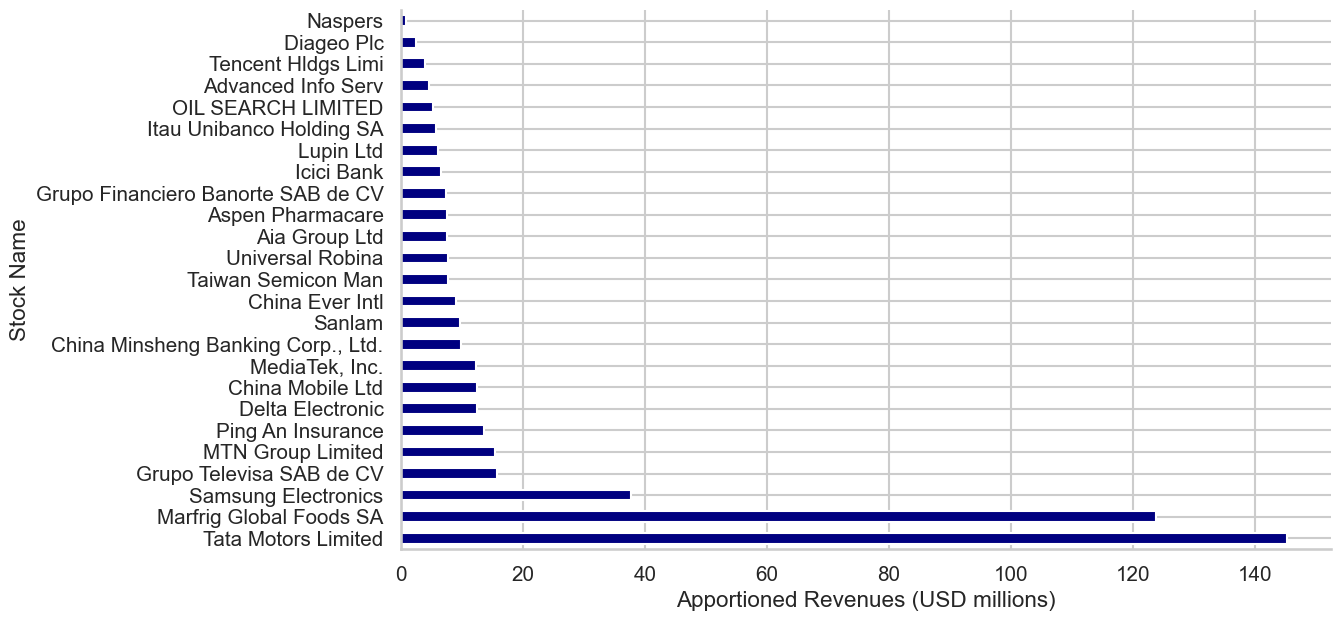

In [225]:
plt.figure(figsize=(12,7))

ax = df['Apportioned Revenues in millions of USD'].sort_values(ascending=False).plot.barh(rot=0, color="navy")
plt.xlabel('Apportioned Revenues (USD millions)')
sns.despine()

### Calculate Portfolio Carbon to Revenue 
(= Total apportioned emissions in tonnes / Total apportioned revenues in USD million) 

In [226]:
df['carbon_to_revenue'] = df['Apportioned Direct+FirstTier GHG Emissions (Tonnes)'] / df['Apportioned Revenues in millions of USD']

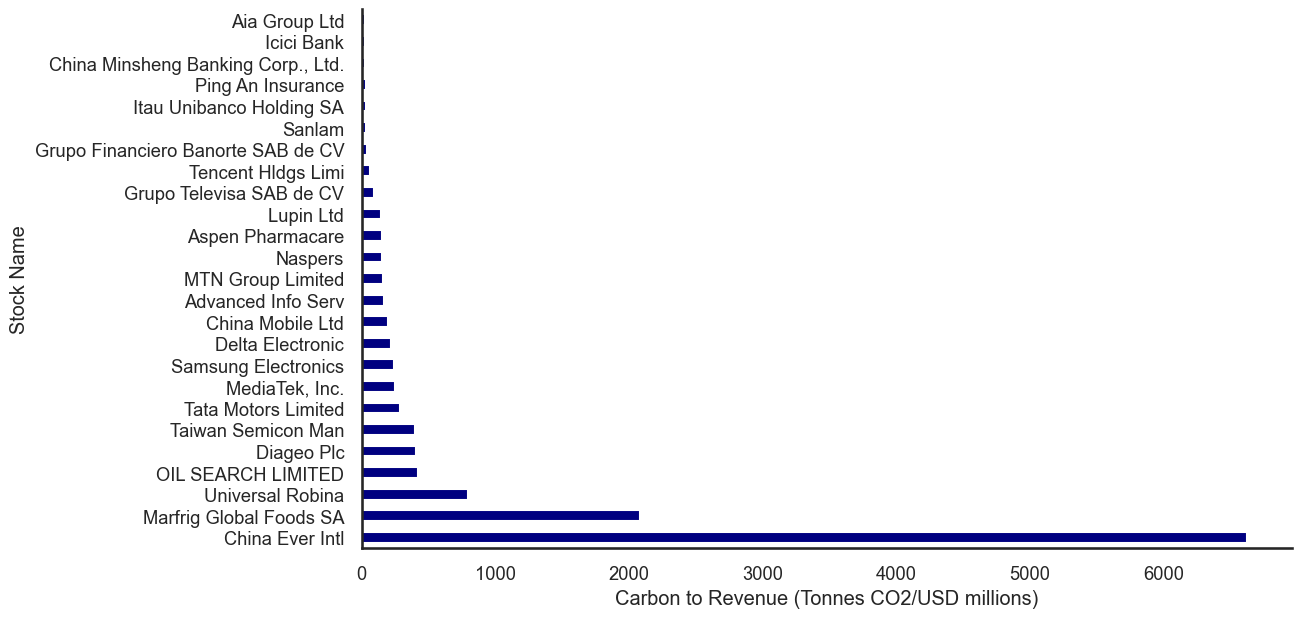

In [228]:
sns.set(context='talk', style='white', palette='deep', font='sans-serif', 
        font_scale=0.8, color_codes=True, rc=None)

plt.figure(figsize=(12,7))
ax = df['carbon_to_revenue'].sort_values(ascending=False).plot.barh(rot=0, color="navy")

plt.xlabel('Carbon to Revenue (Tonnes CO2/USD millions)')

sns.despine()

### Calculate Portfolio Carbon to Revenue 
(= Total apportioned emissions in tonnes / Total apportioned revenues in USD million) 

In [229]:
total_apportioned_emissions = np.sum(df['Apportioned Direct+FirstTier GHG Emissions (Tonnes)'])
total_apportioned_revenue = np.sum(df['Apportioned Revenues in millions of USD'])
portfolio_carbon_to_revenue = total_apportioned_emissions / total_apportioned_revenue
print('total_apportioned_emissions', total_apportioned_emissions)
print('total_apportioned_revenue', total_apportioned_revenue)
print('portfolio_carbon_to_revenue', portfolio_carbon_to_revenue)
#portfolio_carbon_to_revenue2 = np.mean(carbon_to_revenue)
#print(np.mean(portfolio_carbon_to_revenue))
#print(np.mean(portfolio_carbon_to_revenue2))

total_apportioned_emissions 396893.81827707746
total_apportioned_revenue 490.5756505979691
portfolio_carbon_to_revenue 809.0369299684938


## Does it make sense that sum/sum not equal to mean?

### Weighted Average Carbon Intensity (WACI) of the Portfolio
= Sum of each holding’s carbon-to-revenue intensity x the % share/weight of that holding in the portfolio)

In [35]:
print(df['Weight in Portfolio (%)'].head())

Stock Name
Samsung Electronics    9%
Taiwan Semicon Man     8%
Tencent Hldgs Limi     7%
Naspers                5%
Tata Motors Limited    5%
Name: Weight in Portfolio (%), dtype: object


### convert column to number

In [36]:
weight_in_portfolio = df['Weight in Portfolio (%)'].str.rstrip("%").astype(float)/100
WACI_all = df['carbon_to_revenue'] * weight_in_portfolio

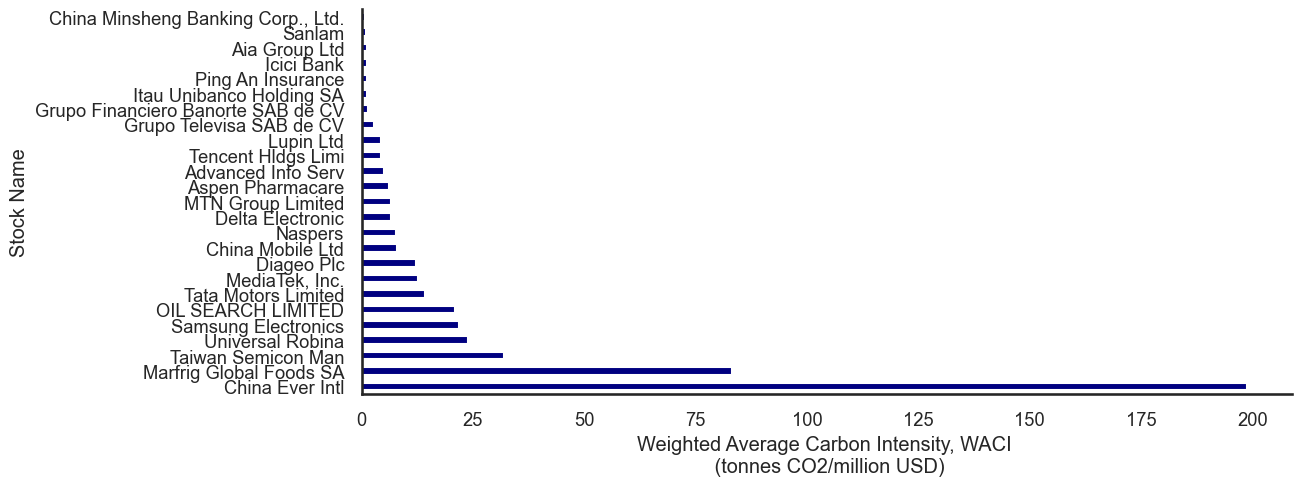

In [195]:
sns.set(context='talk', style='white', palette='deep', font='sans-serif', 
        font_scale=0.8, color_codes=True, rc=None)

plt.figure(figsize=(12,5))
ax = WACI_all.sort_values(ascending=False).plot.barh(rot=0, color="navy")
plt.xlabel('Weighted Average Carbon Intensity, WACI \n (tonnes CO2/million USD)')
sns.despine()

In [58]:
print(np.sum(WACI_all))

478.71724522633826


In [298]:


var1 = 'Company Direct GHG Emissions (Tonnes)'
var2 = 'Company First Tier Indirect GHG Emissions (Tonnes)'
carbon_emissions = df[var1] + df[var2]
revenue = df['Company Revenue in millions of USD'] 
print(np.corrcoef(carbon_emissions, revenue))




[[1.         0.68526374]
 [0.68526374 1.        ]]


### Rank top 5 best and bottom 5 worst performers in terms of their carbon-to-revenue intensity

5 best

In [43]:
df.sort_values(by=['carbon_to_revenue'], ascending=True, inplace=True)
print('5 best performers')
df['carbon_to_revenue'].head()

5 best performers


Stock Name
Aia Group Ltd                         27.571314
Icici Bank                            27.988317
China Minsheng Banking Corp., Ltd.    28.256862
Ping An Insurance                     29.155148
Itau Unibanco Holding SA              30.347380
Name: carbon_to_revenue, dtype: float64

In [44]:
# rank highest (worst) to lowest
df.sort_values(by=['carbon_to_revenue'], ascending=False, inplace=True)
print('5 worst performers')
df['carbon_to_revenue'].head()

5 worst performers


Stock Name
China Ever Intl            6628.238630
Marfrig Global Foods SA    2080.150830
Universal Robina            793.639588
OIL SEARCH LIMITED          418.326183
Diageo Plc                  405.434715
Name: carbon_to_revenue, dtype: float64

Table of all carbon to revenue values

In [69]:
print(df['carbon_to_revenue'])

Stock Name
China Ever Intl                       6628.238630
Marfrig Global Foods SA               2080.150830
Universal Robina                       793.639588
OIL SEARCH LIMITED                     418.326183
Diageo Plc                             405.434715
Taiwan Semicon Man                     399.813271
Tata Motors Limited                    283.851293
MediaTek, Inc.                         251.203741
Samsung Electronics                    243.655670
Delta Electronic                       221.219239
China Mobile Ltd                       198.931766
Advanced Info Serv                     166.171456
MTN Group Limited                      162.420751
Naspers                                155.276208
Aspen Pharmacare                       151.521739
Lupin Ltd                              143.519984
Grupo Televisa SAB de CV                89.319552
Tencent Hldgs Limi                      62.521942
Grupo Financiero Banorte SAB de CV      36.478573
Sanlam                                 

In [72]:
df['GICS Sector']

Stock Name
China Ever Intl                                  Industrials
Marfrig Global Foods SA                     Consumer Staples
Universal Robina                            Consumer Staples
OIL SEARCH LIMITED                                    Energy
Diageo Plc                                  Consumer Staples
Taiwan Semicon Man                    Information Technology
Tata Motors Limited                   Consumer Discretionary
MediaTek, Inc.                        Information Technology
Samsung Electronics                   Information Technology
Delta Electronic                      Information Technology
China Mobile Ltd                      Communication Services
Advanced Info Serv                    Communication Services
MTN Group Limited                     Communication Services
Naspers                               Consumer Discretionary
Aspen Pharmacare                                 Health Care
Lupin Ltd                                        Health Care
Grupo Televis

## Make a distribution of how many companies in each sector

In [53]:
df.groupby('GICS Sector')[['Value Of Holding in USD','Apportioned Direct+FirstTier GHG Emissions (Tonnes)']].describe()

Value Of Holding in USD                              \
                                         count          mean           std   
GICS Sector                                                                  
Communication Services                     5.0  2.200000e+07  1.036822e+07   
Consumer Discretionary                     2.0  2.500000e+07  0.000000e+00   
Consumer Staples                           3.0  1.666667e+07  2.886751e+06   
Energy                                     1.0  2.500000e+07           NaN   
Financials                                 7.0  1.857143e+07  2.439750e+06   
Health Care                                2.0  1.750000e+07  3.535534e+06   
Industrials                                1.0  1.500000e+07           NaN   
Information Technology                     4.0  3.375000e+07  1.652019e+07   

                                                                        \
                               min         25%         50%         75%   
GICS Sector                                                              
Communication Services  15000000.0  15000000.0  20000000.0  20000000.0   
Consumer Discretionary  25000000.0  25000000.0  25000000.0  25000000.0   
Consumer Staples        15000000.0  15000000.0  15000000.0  17500000.0   
Energy                  25000000.0  25000000.0  25000000.0  25000000.0   
Financials              15000000.0  17500000.0  20000000.0  20000000.0   
Health Care             15000000.0  16250000.0  17500000.0  18750000.0   
Industrials             15000000.0  15000000.0  15000000.0  15000000.0   
Information Technology  15000000.0  22500000.0  35000000.0  46250000.0   

                                    \
                               max   
GICS Sector                          
Communication Services  40000000.0   
Consumer Discretionary  25000000.0   
Consumer Staples        20000000.0   
Energy                  25000000.0   
Financials              20000000.0   
Health Care             20000000.0   
Industrials             15000000.0   
Information Technology  50000000.0   

                       Apportioned Direct+FirstTier GHG Emissions (Tonnes)  \
                                                                     count   
GICS Sector                                                                  
Communication Services                                                5.0    
Consumer Discretionary                                                2.0    
Consumer Staples                                                      3.0    
Energy                                                                1.0    
Financials                                                            7.0    
Health Care                                                           2.0    
Industrials                                                           1.0    
Information Technology                                                4.0    

                                                                   \
                                mean            std           min   
GICS Sector                                                         
Communication Services   1478.434919    1004.155901    247.376993   
Consumer Discretionary  20675.543765   29064.731953    123.674708   
Consumer Staples        88204.145585  146692.988557    977.396693   
Energy                   2170.224535            NaN   2170.224535   
Financials                259.120818      78.353498    174.904271   
Health Care              1010.083813     189.649197    875.981580   
Industrials             59387.468191            NaN  59387.468191   
Information Technology   4536.603329    3108.101820   2760.790811   

                                                                   \
                                 25%           50%            75%   
GICS Sector                                                         
Communication Services    773.638001   1406.476209    2471.426181   
Consumer Discretionary  10399.60923

### Produce a bar chart showing the portfolio’s value of holdings (in % terms) by sector alongside the portfolio’s apportioned Direct + First Tier Indirect GHG emissions (in % terms). 

In [230]:
gp_sum = df.groupby('GICS Sector').sum()
sector_percent_value_holding = (gp_sum['Value Of Holding in USD'] / np.sum(gp_sum['Value Of Holding in USD'])) * 100
#gp_sum
sector_percent_emissions = (gp_sum['Apportioned Direct+FirstTier GHG Emissions (Tonnes)'] / np.sum(gp_sum['Apportioned Direct+FirstTier GHG Emissions (Tonnes)']))*100
print(sector_percent_value_holding)
print(sector_percent_emissions)

GICS Sector
Communication Services    20.000000
Consumer Discretionary     9.090909
Consumer Staples           9.090909
Energy                     4.545455
Financials                23.636364
Health Care                6.363636
Industrials                2.727273
Information Technology    24.545455
Name: Value Of Holding in USD, dtype: float64
GICS Sector
Communication Services     1.862507
Consumer Discretionary    10.418678
Consumer Staples          66.670839
Energy                     0.546802
Financials                 0.457010
Health Care                0.508994
Industrials               14.963062
Information Technology     4.572108
Name: Apportioned Direct+FirstTier GHG Emissions (Tonnes), dtype: float64


In [231]:
gp_sum = df.groupby('GICS Sector').sum()
sector_percent_value_holding = (gp_sum['Value Of Holding in USD'] / np.sum(gp_sum['Value Of Holding in USD'])) * 100
#gp_sum
sector_percent_emissions = (gp_sum['Apportioned Direct+FirstTier GHG Emissions (Tonnes)'] / np.sum(gp_sum['Apportioned Direct+FirstTier GHG Emissions (Tonnes)']))*100
print(sector_percent_value_holding)
print(sector_percent_emissions)

GICS Sector
Communication Services    20.000000
Consumer Discretionary     9.090909
Consumer Staples           9.090909
Energy                     4.545455
Financials                23.636364
Health Care                6.363636
Industrials                2.727273
Information Technology    24.545455
Name: Value Of Holding in USD, dtype: float64
GICS Sector
Communication Services     1.862507
Consumer Discretionary    10.418678
Consumer Staples          66.670839
Energy                     0.546802
Financials                 0.457010
Health Care                0.508994
Industrials               14.963062
Information Technology     4.572108
Name: Apportioned Direct+FirstTier GHG Emissions (Tonnes), dtype: float64


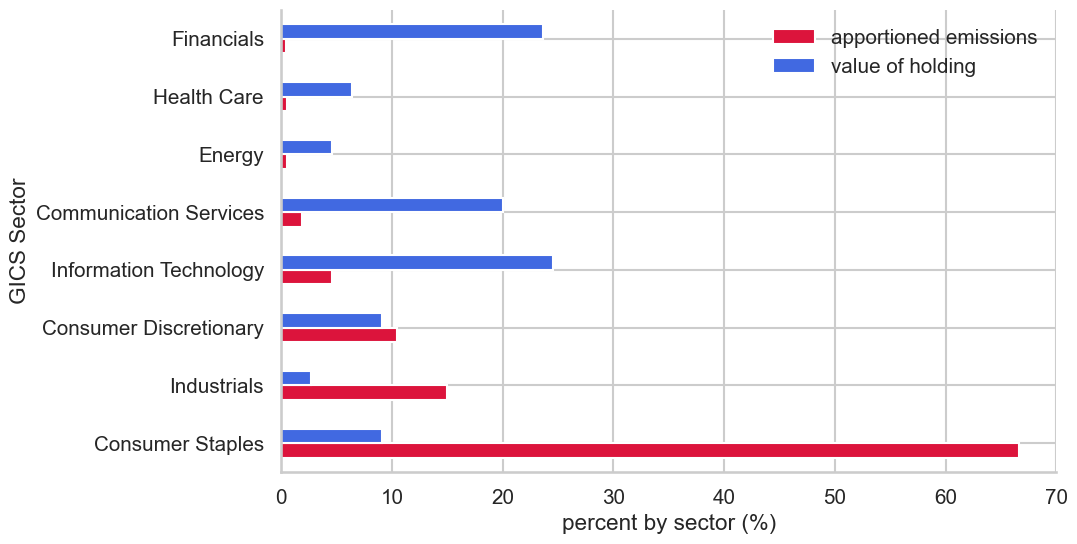

In [232]:
sns.set(context='talk', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=0.9, color_codes=True, rc=None)

df_subset_plot = pd.DataFrame({
                    'sector_percent_emissions': sector_percent_emissions,
                    'sector_percent_value_holding': sector_percent_value_holding,
                                }, 
                                )
ax = df_subset_plot.sort_values(
                        by="sector_percent_emissions",
                        ascending=False,
    
).plot.barh(rot=0, color=['crimson','royalblue'], figsize=(10,6))
plt.xlabel('percent by sector (%)')
sns.despine()
plt.legend(["apportioned emissions", "value of holding"], frameon=False);

GICS Sector
Communication Services     57.329723
Consumer Discretionary     90.916314
Consumer Staples          876.592671
Energy                           NaN
Financials                  3.086777
Health Care                 5.658096
Industrials                      NaN
Information Technology     81.560435
Name: Company Carbon Intensity (tCO2e/million USD), dtype: float64


Text(0.5, 1.0, 'Sectoral Carbon Intensity - Direct and First-Tier Indirect Emissions')

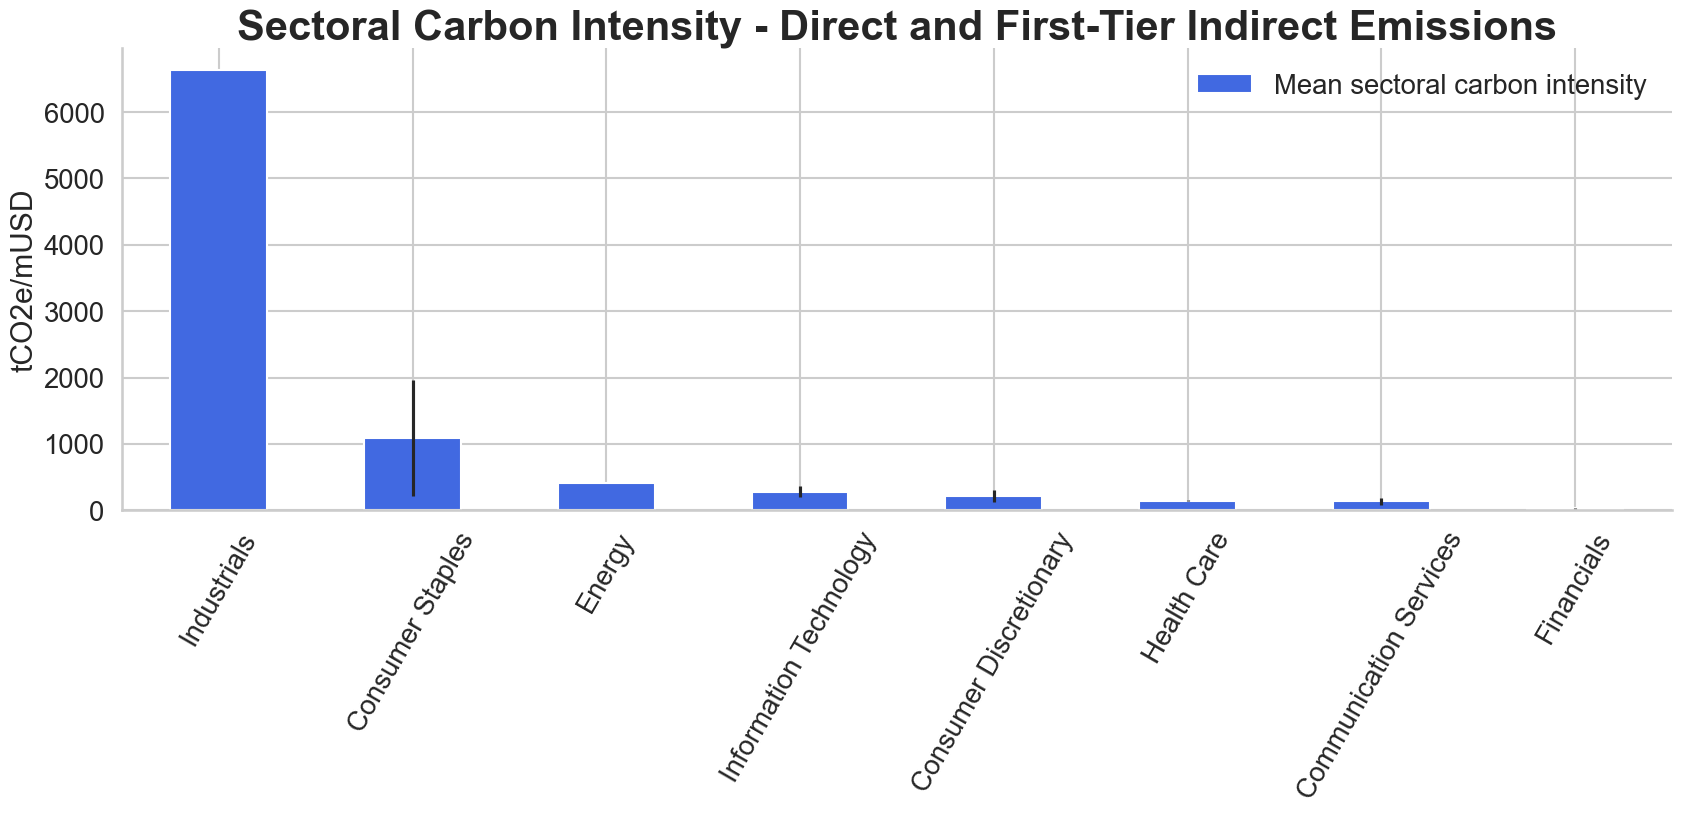

In [233]:
sns.set(context='talk', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)

gp_mean = df.groupby('GICS Sector').mean()
gp_std = df.groupby('GICS Sector').std()
print(gp_std['Company Carbon Intensity (tCO2e/million USD)'])

df_subset_plot = pd.DataFrame({
                    'Company Carbon Intensity (tCO2e/million USD)': gp_mean['Company Carbon Intensity (tCO2e/million USD)'],
                    #'sector_percent_value_holding': sector_percent_value_holding,
    'std': gp_std['Company Carbon Intensity (tCO2e/million USD)'],
                                }, 
                                )
ax = df_subset_plot['Company Carbon Intensity (tCO2e/million USD)'].sort_values(
                        #by="Company Carbon Intensity (tCO2e/million USD)",
                        ascending=False,
    
    
).plot.bar(rot=60, color=['royalblue'], 
           yerr=df_subset_plot['std'],
           figsize=(20,6))
plt.ylabel('tCO2e/mUSD')
plt.xlabel('')
sns.despine()
plt.legend(["Mean sectoral carbon intensity"], frameon=False)
plt.title('Sectoral Carbon Intensity - Direct and First-Tier Indirect Emissions',fontweight='bold', fontsize=30)

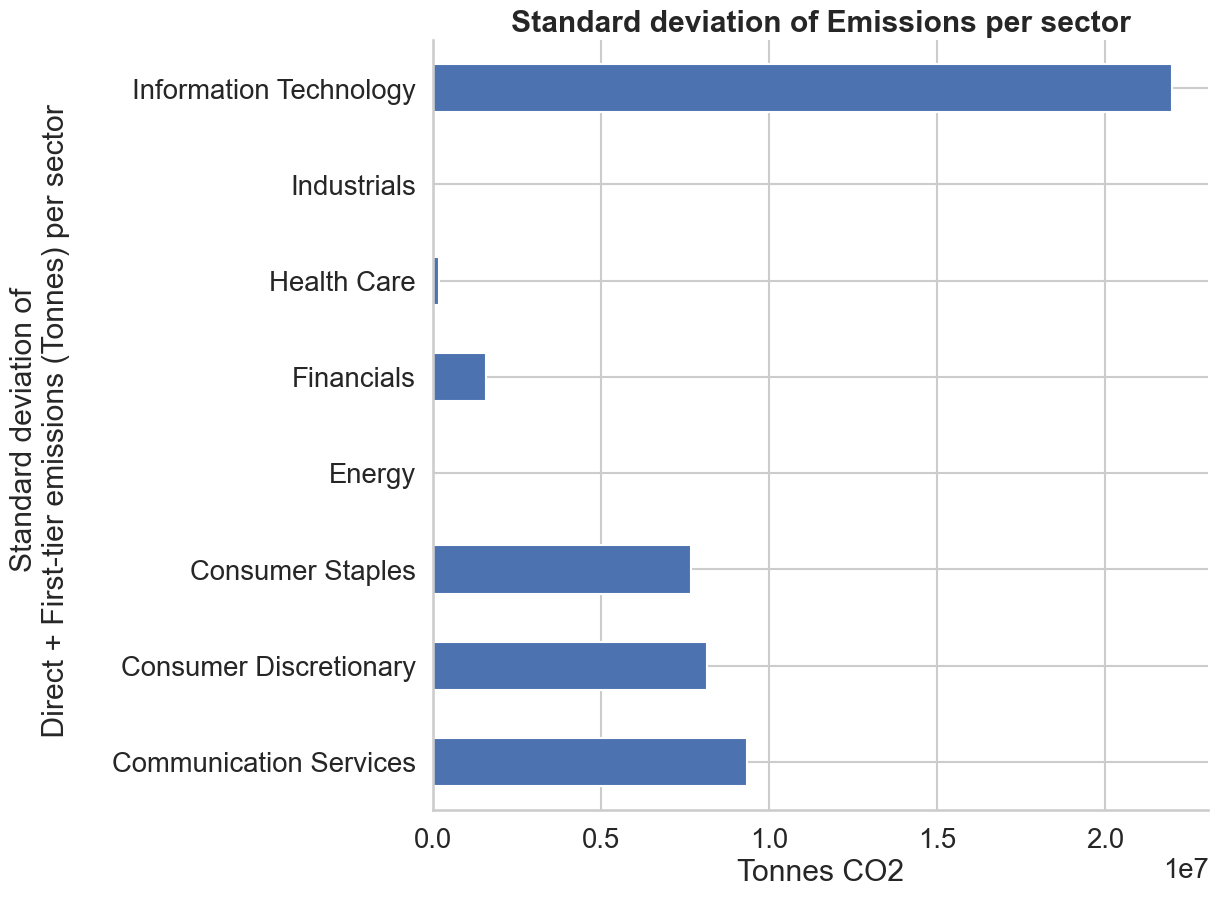

In [269]:
sns.set(context='talk', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)


gp = df.groupby('GICS Sector').std()
var1 = 'Company Direct GHG Emissions (Tonnes)'
var2 = 'Company First Tier Indirect GHG Emissions (Tonnes)'
carbon_emissions = gp[var1] + gp[var2]
#carbon_emissions
# make pieplot of this
carbon_emissions.plot.barh(y='GICS Sector',
                          figsize=(10, 10),
                          #autopct='%1.0f%%'
                         )
plt.ylabel('Standard deviation of \n Direct + First-tier emissions (Tonnes) per sector',
          labelpad=30)
plt.xlabel('Tonnes CO2')
plt.title('Standard deviation of Emissions per sector', fontweight="bold")
sns.despine()

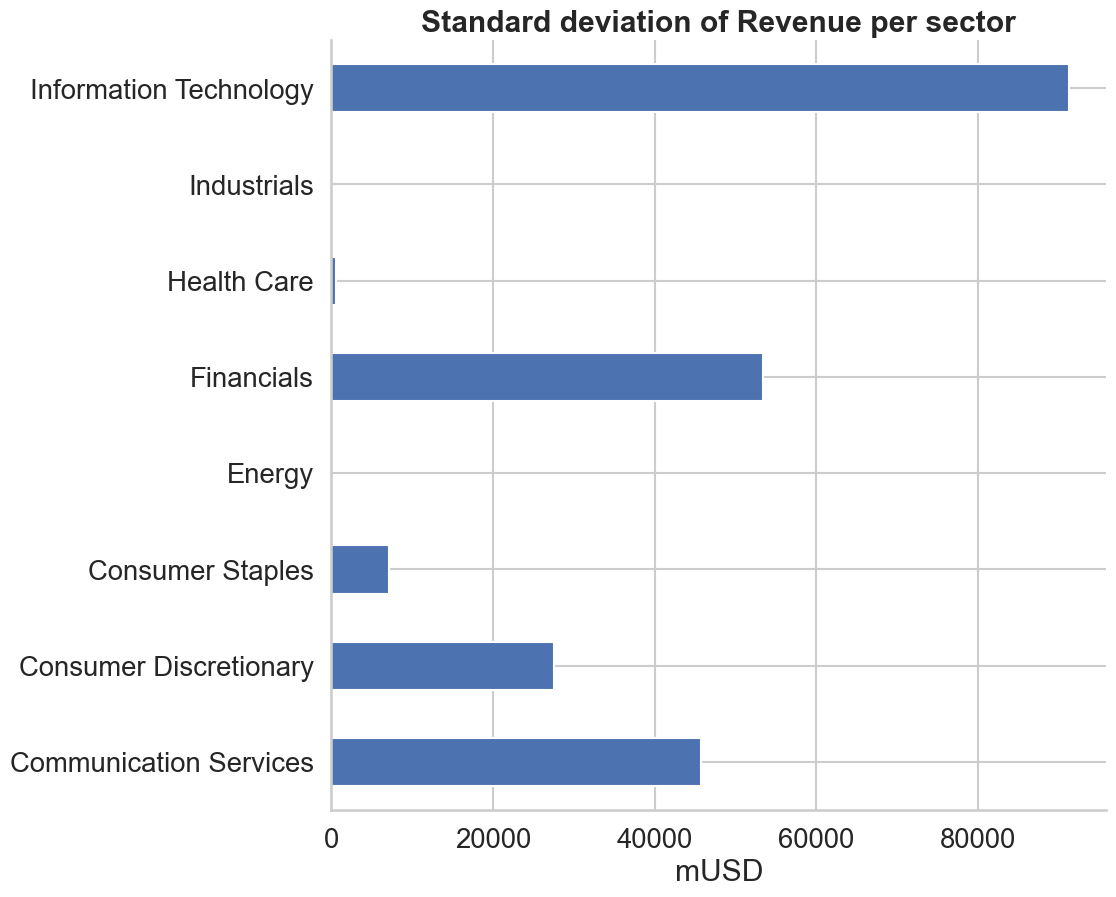

In [268]:
sns.set(context='talk', style='whitegrid', palette='deep', font='sans-serif', 
        font_scale=1.2, color_codes=True, rc=None)


gp = df.groupby('GICS Sector').std()
revenue = gp['Company Revenue in millions of USD'] 
revenue.plot.barh(y='GICS Sector',
                          figsize=(10, 10),
                          #autopct='%1.0f%%'
                         )
plt.ylabel('',labelpad=30)
plt.xlabel('mUSD')
plt.title('Standard deviation of Revenue per sector', fontweight="bold")
sns.despine()

## Which GICS Sectors contribute most to the portfolio’s absolute GHG emissions and by how much?

## Bar plot of summed contributions

GICS Sector
Information Technology    65758510
Communication Services    28156504
Consumer Staples          25597091
Industrials               23026501
Consumer Discretionary    12523033
Financials                 7739076
Health Care                 853751
Energy                      663047
Name: total, dtype: int64


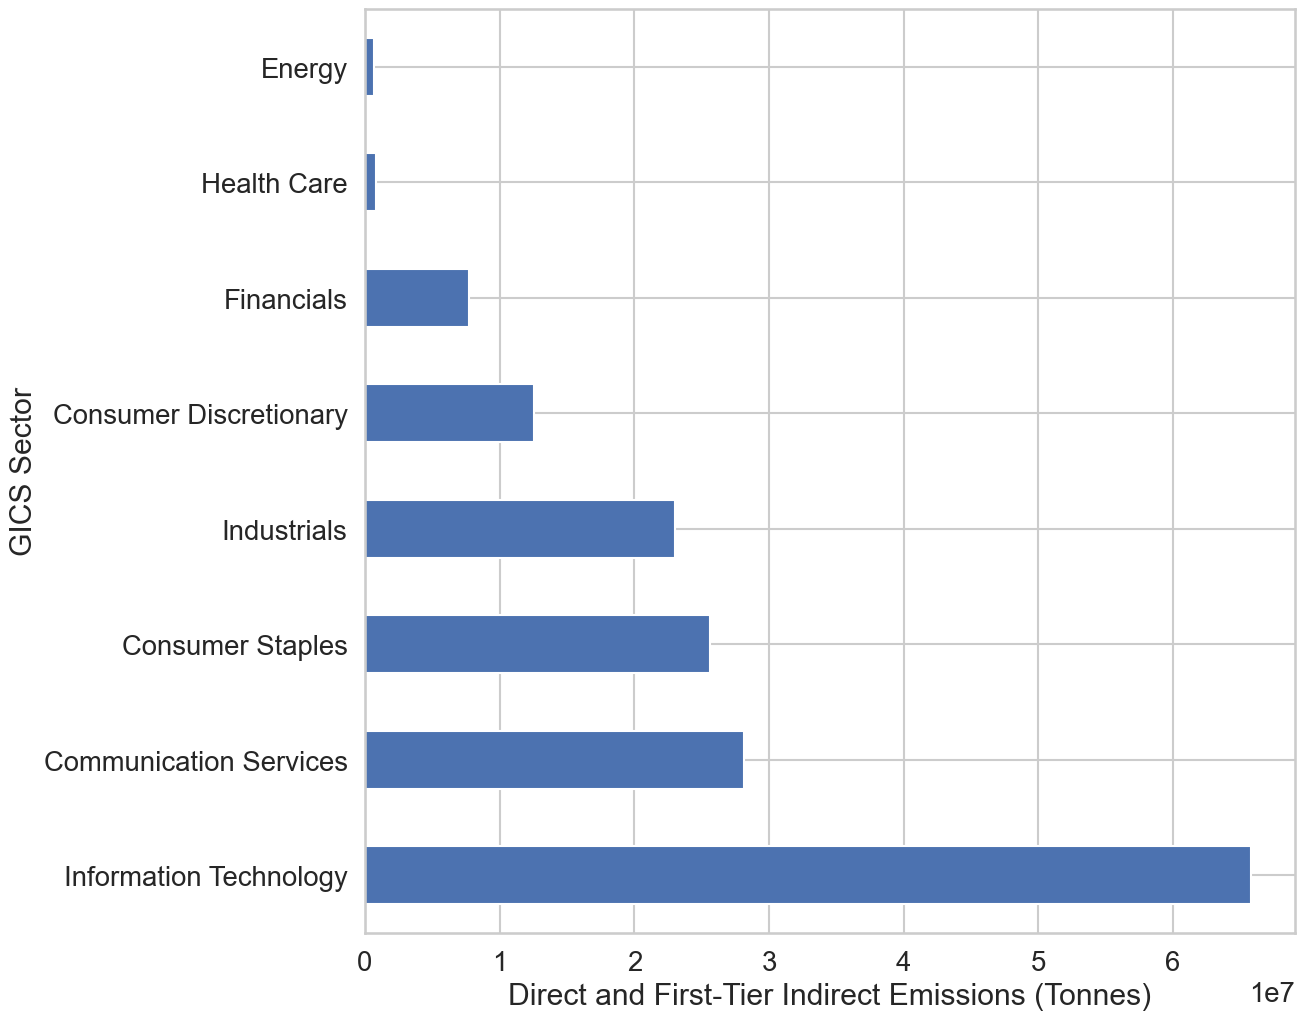

In [295]:
df['total'] = df['Company Direct GHG Emissions (Tonnes)'] + df['Company First Tier Indirect GHG Emissions (Tonnes)']
gp_sum = df.groupby('GICS Sector').sum()
ax = gp_sum["total"].sort_values(ascending=False).plot.barh(y='total', figsize=(12, 12), 
                       #autopct='%1.0f%%',
                     #cmap=plt.get_cmap('bwr_r')
                     )
plt.xlabel('Direct and First-Tier Indirect Emissions (Tonnes)')
ax.legend('', frameon=False)
print(gp_sum['total'].sort_values(ascending=False))
#ax.yaxis.set_label_coords(-.1, .5)

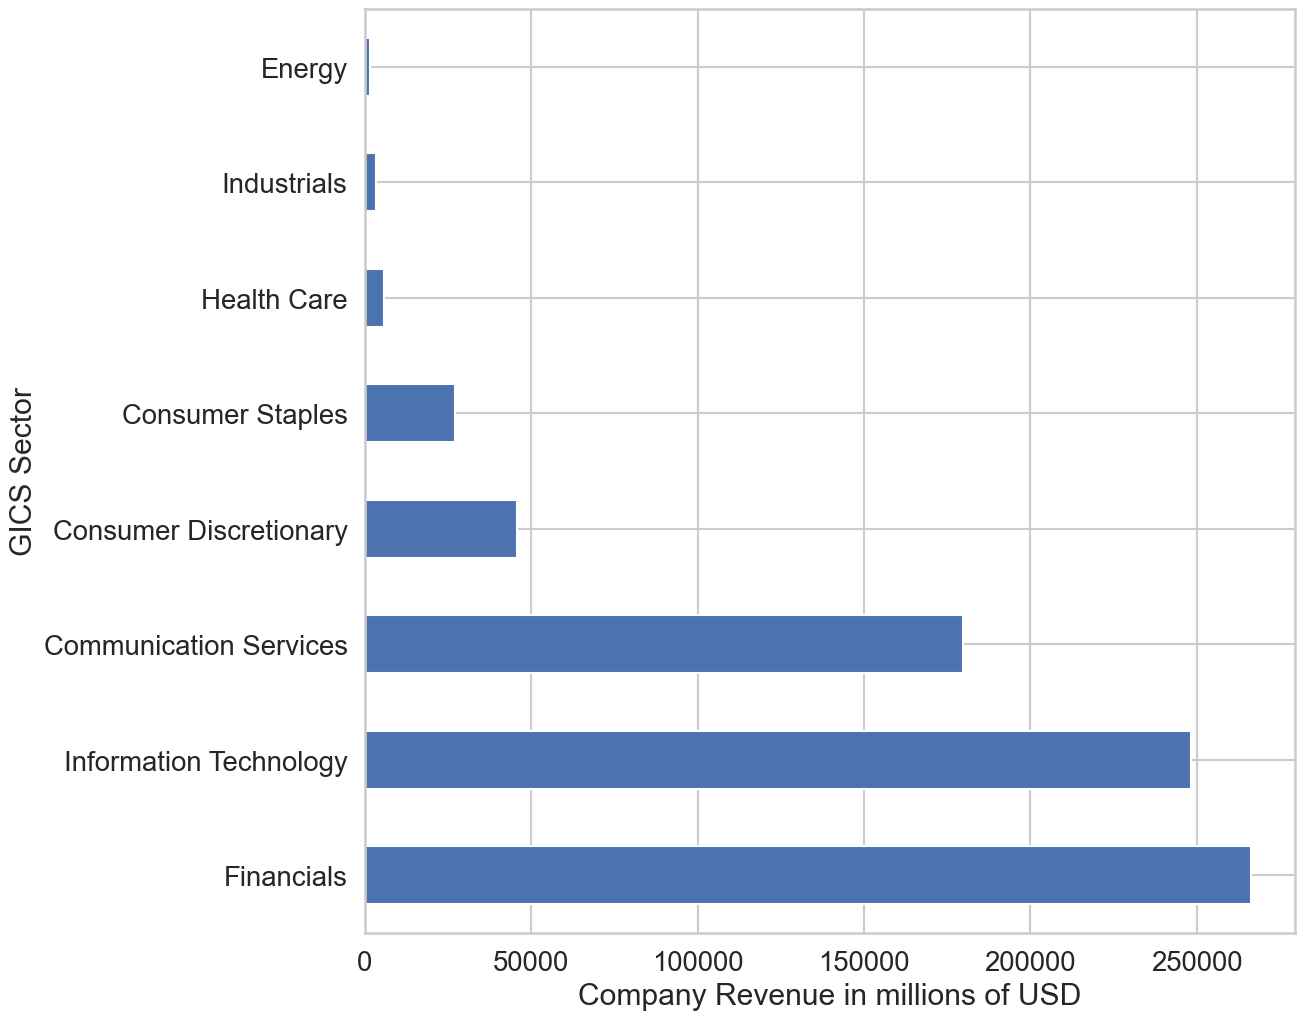

In [297]:
ax = gp_sum["Company Revenue in millions of USD"].sort_values(ascending=False).plot.barh(y='total', figsize=(12, 12), 
                       #autopct='%1.0f%%',
                     #cmap=plt.get_cmap('bwr_r')
                     )
plt.xlabel('Company Revenue in millions of USD')
ax.legend('', frameon=False)
#ax.yaxis.set_label_coords(-.1, .5)

## Make pie chart

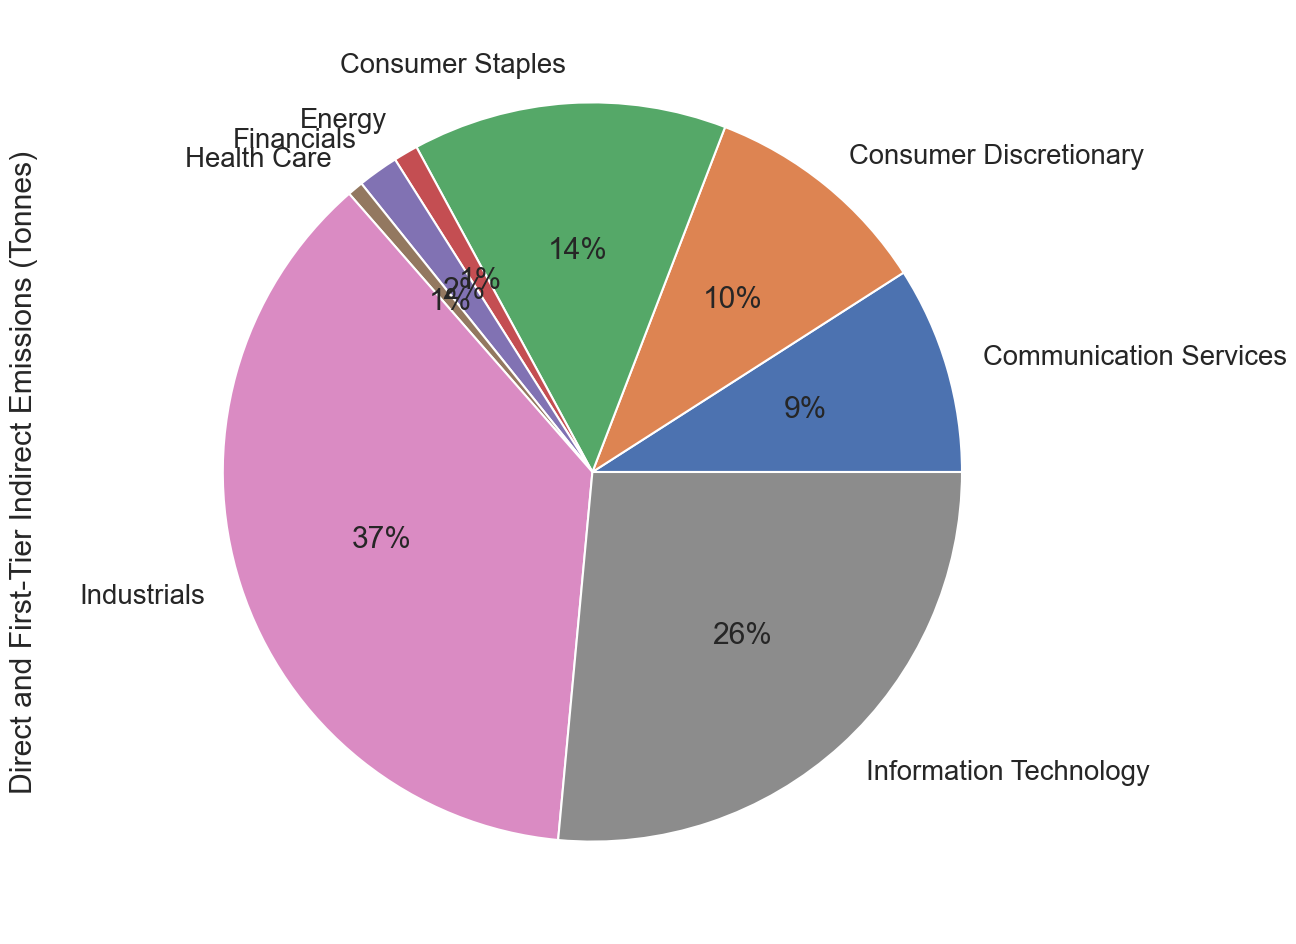

In [270]:
df['total'] = df['Company Direct GHG Emissions (Tonnes)'] + df['Company First Tier Indirect GHG Emissions (Tonnes)']
gp_mean = df.groupby('GICS Sector').mean()
#gp_mean['emissions'] = gp_mean['Company Direct GHG Emissions (Tonnes)'] + gp_mean['Company First Tier Indirect GHG Emissions (Tonnes)']
ax = gp_mean.plot.pie(y='total', figsize=(12, 12), autopct='%1.0f%%',
                     #cmap=plt.get_cmap('bwr_r')
                     )
#ax.legend(loc='upper center', bbox_to_anchor=(1.2, 1.),
#          ncol=2, fancybox=True, shadow=True)
# show percentages
plt.ylabel('Direct and First-Tier Indirect Emissions (Tonnes)')
ax.legend('', frameon=False)
ax.yaxis.set_label_coords(-.1, .5)

### Using the S&P Carbon Global Standard, can you identify any potential targets for engagement or divestment based on worst in class performance, relative to their wider GICS Industry Group? Please explain your reasoning.

In [96]:
df[['carbon_to_revenue', 'GICS Sector']].head(10)
# China Ever Intl
# Marfrig Global Foods SA
# find highest emitter for each category


,carbon_to_revenue,GICS Sector
Stock Name,,
China Ever Intl,6628.238630,Industrials
Marfrig Global Foods SA,2080.150830,Consumer Staples
Universal Robina,793.639588,Consumer Staples
OIL SEARCH LIMITED,418.326183,Energy
Diageo Plc,405.434715,Consumer Staples
Taiwan Semicon Man,399.813271,Information Technology
Tata Motors Limited,283.851293,Consumer Discretionary
"MediaTek, Inc.",251.203741,Information Technology
Samsung Electronics,243.655670,Information Technology


In [99]:
df[['carbon_to_revenue', 'GICS Sector']].sort_values(ascending=True, by="carbon_to_revenue").head(10)

,carbon_to_revenue,GICS Sector
Stock Name,,
Aia Group Ltd,27.571314,Financials
Icici Bank,27.988317,Financials
"China Minsheng Banking Corp., Ltd.",28.256862,Financials
Ping An Insurance,29.155148,Financials
Itau Unibanco Holding SA,30.347380,Financials
Sanlam,31.237753,Financials
Grupo Financiero Banorte SAB de CV,36.478573,Financials
Tencent Hldgs Limi,62.521942,Communication Services
Grupo Televisa SAB de CV,89.319552,Communication Services


# find worst performer per sector

In [124]:
gp_max = df.groupby('GICS Sector').max()

,Reporting Year,Isin,GICS Industry Group,Value Of Holding in USD,Weight in Portfolio (%),Company Revenue in millions of USD,Market Cap in millions of USD,Company Direct GHG Emissions (Tonnes),Company First Tier Indirect GHG Emissions (Tonnes),GHG Emissions Disclosure Type,Company Carbon Intensity (tCO2e/million USD),% Equity Ownership of Company,Apportioned Direct GHG Emissions (Tonnes),Apportioned First Tier GHG Indirect Emissions (Tonnes),Apportioned Direct+FirstTier GHG Emissions (Tonnes),Apportioned Revenues in millions of USD,Rank (Best to worst),Rank (Worst to best),Equity Ownership of Company,carbon_to_revenue
GICS Sector,,,,,,,,,,,,,,,,,,,,
Communication Services,2019,ZAE000042164,Telecommunication Services,40000000,7%,111366,477799,330275,21823960,Partial Disclosure,198.931766,NaN,394.570341,2434.582197,2493.257210,15.746566,NaN,NaN,0.002986,198.931766
Consumer Discretionary,2019,ZAE000015889,Retailing,25000000,5%,42318,103298,516445,11495574,Partial Disclosure,283.851293,NaN,1772.532262,39454.880560,41227.412823,145.242998,NaN,NaN,0.003432,283.851293
Consumer Staples,2019,PHY9297P1004,"Food, Beverage & Tobacco",20000000,4%,16650,103599,458759,16463268,Partial Disclosure,2080.150830,NaN,6982.633181,250582.465753,257565.098935,123.820396,NaN,NaN,0.015221,2080.150830
Energy,2019,PG0008579883,Energy,25000000,5%,1585,7638,502773,160274,Partial Disclosure,418.326183,NaN,1645.630401,524.594135,2170.224535,5.187876,NaN,NaN,0.003273,418.326183
Financials,2019,ZAE000070660,Insurance,20000000,4%,156386,228477,55209,4552301,Partial Disclosure,36.478573,NaN,17.257396,398.490964,399.117373,13.689430,NaN,NaN,0.001314,36.478573
Health Care,2018,ZAE000066692,"Pharmaceuticals, Biotechnology & Life Sciences",20000000,4%,3312,8772,88366,457535,Partial Disclosure,151.521739,NaN,219.961832,1043.171455,1144.186047,7.551300,NaN,NaN,0.002489,151.521739
Industrials,2018,HK0257001336,Commercial & Professional Services,15000000,3%,3474,5816,22125866,900635,Full Disclosure,6628.238630,NaN,57064.647524,2322.820667,59387.468191,8.959766,NaN,NaN,0.002579,6628.238630
Information Technology,2019,TW0002454006,Technology Hardware & Equipment,50000000,9%,197732,262048,4302190,43876333,Partial Disclosure,399.813271,NaN,820.878236,8371.812225,9192.690461,37.728202,NaN,NaN,0.001588,399.813271


In [139]:
df.loc[df['GICS Industry Group']=='Telecommunication Services']

,Reporting Year,Isin,GICS Sector,GICS Industry Group,Value Of Holding in USD,Weight in Portfolio (%),Company Revenue in millions of USD,Market Cap in millions of USD,Company Direct GHG Emissions (Tonnes),Company First Tier Indirect GHG Emissions (Tonnes),...,Company Carbon Intensity (tCO2e/million USD),% Equity Ownership of Company,Apportioned Direct GHG Emissions (Tonnes),Apportioned First Tier GHG Indirect Emissions (Tonnes),Apportioned Direct+FirstTier GHG Emissions (Tonnes),Apportioned Revenues in millions of USD,Rank (Best to worst),Rank (Worst to best),Equity Ownership of Company,carbon_to_revenue
Stock Name,,,,,,,,,,,,,,,,,,,,,
China Mobile Ltd,2018,HK0941009539,Communication Services,Telecommunication Services,20000000,4%,111366,179283,330275,21823960,...,198.931766,NaN,36.843984,2434.582197,2471.426181,12.423487,NaN,NaN,0.000112,198.931766
Advanced Info Serv,2018,TH0268010Z03,Communication Services,Telecommunication Services,15000000,3%,5255,16931,10687,862544,...,166.171456,NaN,9.468135,764.169866,773.638001,4.655661,NaN,NaN,0.000886,166.171456
MTN Group Limited,2019,ZAE000042164,Communication Services,Telecommunication Services,20000000,4%,10486,13662,269531,1433613,...,162.420751,NaN,394.570341,2098.686869,2493.257210,15.350608,NaN,NaN,0.001464,162.420751
